[0.58332872 0.73538018 0.85135379 0.92608951 0.9673274  0.98707926
 0.99539739 0.99851298 0.99956141 0.99988119 0.99997028 0.9999931
 0.99999851 0.9999997  0.99999994 0.99999999 1.         1.
 1.         1.         1.        ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.27003945 0.42644065 0.59219167 0.73924305 0.85016803 0.92242081
 0.96363883 0.98449033 0.99394612 0.99782599 0.9992781  0.99977731
 0.99993591 0.99998272 0.99999562 0.99999895 0.99999976 0.99999995
 0.99999999 1.         1.        ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Policy 0  ===========
Evaluating ..
Improving ..
Policy 1  ===========
Evaluating ..
Improving ..
Policy 2  ===========
Evaluating ..
Improving ..
Policy 3  ===========
Evaluating ..
Improving ..


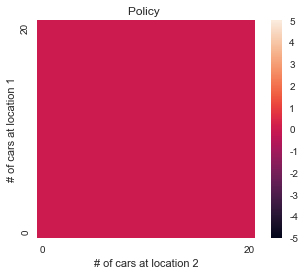

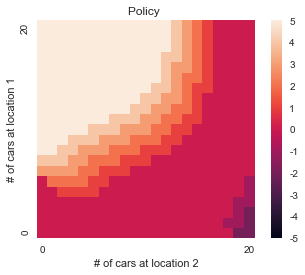

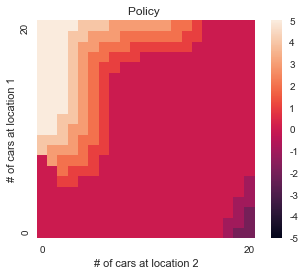

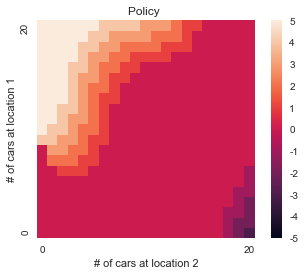

In [16]:
import numpy as np
from math import factorial
import seaborn as sns; sns.set()
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

class JacksCarRental:
    def __init__(self):
        self.maxCars = 20
        self.nCars=21
        self.maxMove = 5
        self.maxMorning = 20
        self.rentPrice = 10
        self.moveCost = 2
        self.dRate = 0.9
        self.theta = 0.00001
        self.valueMat = np.zeros((self.nCars,self.nCars))
        self.policyMat = np.zeros((self.nCars,self.nCars))
        self.rew1,self.tP1 = self.initProbs(3,3)
        self.rew2,self.tP2 = self.initProbs(4,2)
        self.policies=[]
        
    def initProbs(self,rent_Lambda,return_Lambda):
        rtv = st.poisson(rent_Lambda)
        rnv = st.poisson(return_Lambda)
        rew=np.zeros((self.nCars,self.nCars))
        tP=np.zeros((self.nCars,self.nCars))
        
        for i in range (self.nCars):
            for j in range (self.nCars):
                rn=20
                rn_prob=1
                while  rn+i>=j:
                    true_tot=min(rn+i,self.maxCars)
                    rn_prob=rnv.pmf(rn)
                    
                    rt=true_tot-j
                    rt_prob=rtv.pmf(rt)
                    rew[i][j]+=rt*self.rentPrice*rt_prob*rn_prob
                    tP[i][j]+=rt_prob*rn_prob
                    rn-=1
                rew[i][j]=rew[i][j]/tP[i][j]
        tp2=tP.copy()
        ave=np.sum(tp2, axis=1) 
        print(ave)
        for i in range (self.nCars):
            for j in range (self.nCars):
                tP[i][j]=tP[i][j]/ave[i]
        print(np.sum(tP, axis=1))
        return rew,tP
    
    
    
    def policyIter(self): 
        policyStable = False
        count = 0
        while not policyStable:
            print ('Policy',count,' ===========')
            self.printPolicy(self.policyMat)
            self.policies.append(self.policyMat)
            print ('Evaluating ..')
            self.policyEval()
            print ('Improving ..')
            policyStable = self.policyImprove()
            count += 1
            
    
    
    def calVal(self,n1,n2,a):
        val=0
        val-=np.abs(a)*self.moveCost
        s1_morning=n1-a
        s2_morning=n2+a
        s1_morning=int(s1_morning)
        s2_morning=int(s2_morning)
        for i in range(self.nCars):
            for j in range(self.nCars):
                val+=self.tP1[s1_morning][i]*self.tP2[s2_morning][j]*(self.rew1[s1_morning][i]+
                self.rew2[s2_morning][j]+self.dRate*self.valueMat[i][j])
                
        return val
    
    
    def policyEval(self):
        delta=0.2
        while delta>self.theta :  
            delta=0
            for i in range(self.nCars):
                for j in range (self.nCars):
                    V_tmp=self.valueMat[i,j]
                    a=self.policyMat[i,j]
                    self.valueMat[i,j]=self.calVal(i,j,a)
                    delta=max(delta,np.abs(V_tmp-self.valueMat[i,j]))
        
        
    
    
    def policyImprove(self):
        policyStable=True
        for i in range(self.nCars):
            for j in range(self.nCars):
                a=self.policyMat[i,j]
                self.policyMat[i,j]=self.greedyPolicy(i,j)
                if a!=self.policyMat[i,j]:
                    policyStable=False
                    
        return policyStable
    
    def greedyPolicy(self,n1,n2):
        aMax=self.maxMove
        aMin=-self.maxMove
        bestAction=0
        bestValue=-10000
        for a in range(aMin,aMax+1):
            if (n1-a<0 or n1-a>self.maxCars or n2+a<0 or n2+a>self.maxCars):
                continue
            val=self.calVal(n1,n2,a)
            if val>bestValue:
                bestValue=val
                bestAction=a
            
        return bestAction
    
    def printValues(self,v=None,i=''):
        if not v:
            v = self.valueMat
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title('Values '+str(i))
        aZ = []
        aX = []
        aY = []
        for i in range (jp.nCars):
            for j in range (jp.nCars):
                aX.append(i)
                aY.append(j)
                aZ.append(v[i, j])
        ax.set_ylabel('# of cars at location 1')
        ax.set_xlabel('# of cars at location 2')
        ax.scatter(aX, aY, aZ)
    
    def printPolicy(self,p,i=''):
        plt.figure()
        ticks = [0]+['']*(self.maxCars-1)+[self.maxCars]
        ax = sns.heatmap(p.astype(int),vmax=5,vmin=-5,square=True,xticklabels=ticks,yticklabels=ticks)
        ax.set_title('Policy '+str(i))
        ax.set_ylabel('# of cars at location 1')
        ax.set_xlabel('# of cars at location 2')
        ax.invert_yaxis()
        cbar = ax.collections[0].colorbar
        cbar.set_ticks(np.arange(self.maxMove*2+1)-self.maxMove)
        cbar.set_ticklabels(np.arange(self.maxMove*2+1)-self.maxMove)

        
jp = JacksCarRental()
jp.policyIter()
